<a href="https://colab.research.google.com/github/jomon-r/Minor-Project-Smartknower/blob/main/ML_MAY_MINOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SMARTKNOWER MACHINE LEARNING MAY BATCH - MINOR PROJECT ON IMAGE CLASSIFICATION
# PROJECT SUBMITTED BY JOMON RAJU (jomonraju223@gmail.com)

In [ ]:
# !pip install bing-image-downloader

In [ ]:
# !mkdir images

In [ ]:
# from bing_image_downloader import downloader
# downloader.download("Carrot",limit=50,output_dir='images',adult_filter_off=True)

In [ ]:
# from bing_image_downloader import downloader
# downloader.download("Motorcycle",limit=50,output_dir='images',adult_filter_off=True)

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize

In [2]:
# PREPROCESING THE DATA

In [3]:
target = []
images = []
flat_data =[]

In [4]:
#Drive Link - https://drive.google.com/drive/folders/1Ninq8F16oc7xi2gf-n6Yw2Mdrc-wHy99?usp=sharing

In [5]:
directory ='/content/drive/MyDrive/ML MAY BATCH MINOR PROJECT'

In [6]:
Categories = ['Motorcycle','Dog']

In [7]:
for category in Categories:
  class_num = Categories.index(category)
  path = os.path.join(directory,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    resized_img = resize(img_array,(150,150,3))
    flat_data.append(resized_img.flatten())
    images.append(resized_img)
    target.append(class_num)

In [8]:
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

<BarContainer object of 2 artists>

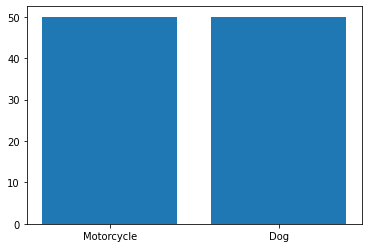

In [9]:
unique,count = np.unique(target,return_counts = True)
plt.bar(Categories,count)

In [10]:
# SPLITTING THE DATA

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=103)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

In [13]:
svc = svm.SVC(probability= True)
model = GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1])

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [18]:
accuracy_score(y_pred,y_test)

0.7333333333333333

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.76      0.84      0.80        19

    accuracy                           0.73        30
   macro avg       0.71      0.69      0.70        30
weighted avg       0.73      0.73      0.73        30



In [20]:
confusion_matrix(y_pred,y_test)

array([[ 6,  5],
       [ 3, 16]])

In [21]:
# SAVING THE MODEL

In [22]:
import pickle
pickle.dump(model,open('img_model.p','wb'))

In [23]:
pmodel =pickle.load(open('img_model.p','rb'))

https://thumbor.forbes.com/thumbor/trim/0x360:4501x2892/fit-in/711x399/smart/https://specials-images.forbesimg.com/imageserve/5c0a960ca7ea43705919981f/0x0.jpg
(396, 711, 3)
Predicted Output: Motorcycle


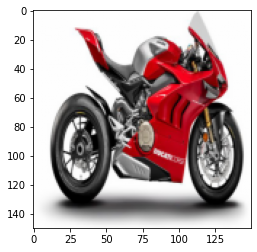

In [24]:
flat_data =[]
url = input()
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = pmodel.predict(flat_data)
y_out = Categories[y_out[0]]
print(f'Predicted Output: {y_out}')